<a href="https://colab.research.google.com/github/akr1139/CO542_LAB_07/blob/main/e17285_lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import the CIFER-10 data set using keras.datasets.

In [2]:
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Print the shape of the training and testing data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


### 2. Study the shapes of the training and testing datasets.

In [3]:
#check image shape
print(f"shape of the train image : {X_train[0].shape}")
print(f"shape of the test image : {X_test[0].shape}")

shape of the train image : (32, 32, 3)
shape of the test image : (32, 32, 3)


### 3. Visualize some images in the train and test tests to understand the dataset.You may use matplotlib.pyplot.imshow to display the images in a grid

train images


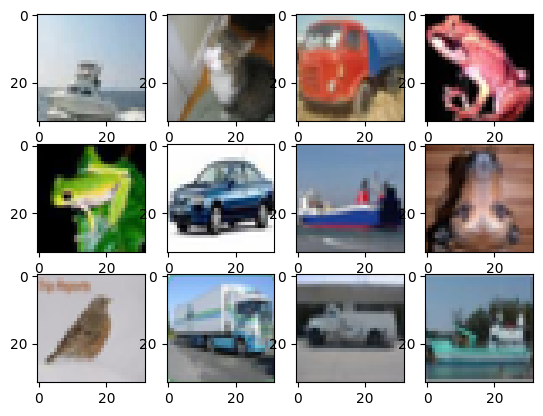

In [4]:
import matplotlib.pyplot as plt
#plot some images in the train dataset
print("train images")
for i in range(12):
  plt.subplot(3, 4, i+1)
  plt.imshow(X_train[i+100])

test images


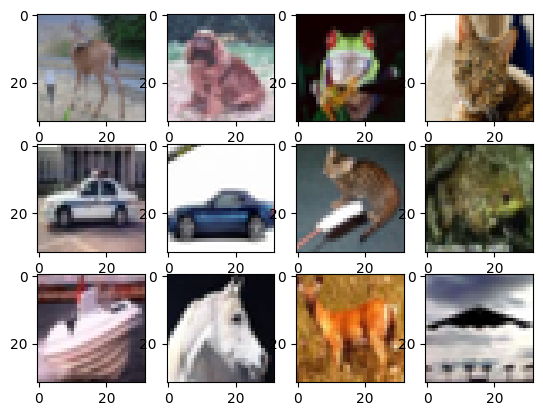

In [5]:
#plot some images in the test dataset
print("test images")
for i in range(12):

  plt.subplot(3, 4, i+1)
  plt.imshow(X_test[i+100])

### 4. Under the data pre-processing procedures,

• Reshape the input datasets accordingly.

• Normalize the pixel values in a range between 0 to 1.

• Convert the class labels into One-Hot encoding vector. Clearly mention the requirement of this conversion.

• Use sklearn.model selection.train test split to further split the training dataset into validation
and training data (e.g. allocate 0.2 of the training set as validation data).


In [6]:
#reshape data to fit model
X_train = X_train.reshape(X_train.shape[0],X_train[0].shape[0],X_train[0].shape[0],3)
X_test = X_test.reshape(X_test.shape[0],X_test[0].shape[0],X_test[0].shape[0],3)

In [7]:
#normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = (X_train / 255.0)
X_test = (X_test / 255.0)

In [9]:
from tensorflow.keras.utils import to_categorical

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
from sklearn.model_selection import train_test_split
#plit the dataset for training and validation purposes
train_X, valid_X, train_label, valid_label = train_test_split(X_train,y_train,test_size=0.2,random_state=13)

### 5.Build the CNN model with three convolutional layers followed by a dense layer and an output layer

accordingly. In this case,

• Select 3 X 3 as the kernal size of each filter.

• Use different number of filters in each convolutional layer (e.g. first layer 32 filters, second layer 64 filters, third layer 128 filters).

• Use LeakyReLU as the activation function. Mention the advantage of using LeakyReLU over ReLU activation function.

• Use 2 X 2 MaxPooling layers, and Dropout layers according to the requirements and mention the purpose behind the usage of Dropout Layers.


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout,LeakyReLU

#build the CNN model
model = Sequential()

#add model layers

# First Convolutional Layer
model.add(Conv2D(32, kernel_size=3, activation=LeakyReLU(alpha=0.3),input_shape=X_train[0].shape))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

# Second Convolutional Layer
model.add(Conv2D(64, kernel_size=3, activation=LeakyReLU(alpha=0.3),input_shape=X_train[0].shape))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

# Third Convolutional Layer
model.add(Conv2D(128, kernel_size=3, activation=LeakyReLU(alpha=0.3),input_shape=X_train[0].shape))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

# Flatten layer to transition from convolutional layers to dense layers
model.add(Flatten())

# Output Layer
model.add(Dense(10, activation='softmax'))

### 6. Compile the model using appropriate parameters and generate the model summery using model.summary() function (In this case make sure to specify the metrics as accuracy).


In [18]:
from keras.optimizers import Adam

# Compile the model accuracy to measure model performance
model.compile(
    optimizer=Adam(learning_rate=0.001),  # You can adjust the learning rate as needed
    #The Adam optimizer is used with a specified learning rate.
    #You can adjust the learning rate based on your specific problem and observations during training.
    loss='categorical_crossentropy',  # Categorical crossentropy for multi-class classification
    #Categorical crossentropy is commonly used for multi-class classification problems.
    metrics=['accuracy']
    #Metrics: Specify 'accuracy' as the metric to monitor during training and evaluation.
)

In [17]:
# Print a summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 64)         

### 7. Train the compiled model using model.fit function and observe the train and validation set performances. In this case, you may have to select an appropriate number of epochs (e.g. 25) and batch size (e.g. 64, 128 or 256).

### Start to RUN @ 2023/11/17 02.17AM End @ 02.47AM
programme took 30min to complete 25 epochs`

In [19]:
#train the model
model.fit(train_X, train_label, validation_data=(valid_X, valid_label),epochs=25,batch_size=64)

Epoch 1/25
625/625 [==============================] - 85s 133ms/step - loss: 1.6161 - accuracy: 0.4072 - val_loss: 1.3282 - val_accuracy: 0.5239
Epoch 2/25
625/625 [==============================] - 68s 108ms/step - loss: 1.2479 - accuracy: 0.5544 - val_loss: 1.1033 - val_accuracy: 0.6207
Epoch 3/25
625/625 [==============================] - 71s 114ms/step - loss: 1.1129 - accuracy: 0.6107 - val_loss: 1.0274 - val_accuracy: 0.6432
Epoch 4/25
625/625 [==============================] - 70s 112ms/step - loss: 1.0268 - accuracy: 0.6395 - val_loss: 0.9376 - val_accuracy: 0.6795
Epoch 5/25
625/625 [==============================] - 72s 115ms/step - loss: 0.9795 - accuracy: 0.6575 - val_loss: 0.9180 - val_accuracy: 0.6862
Epoch 6/25
625/625 [==============================] - 70s 112ms/step - loss: 0.9324 - accuracy: 0.6750 - val_loss: 0.8597 - val_accuracy: 0.7051
Epoch 7/25
625/625 [==============================] - 71s 113ms/step - loss: 0.8999 - accuracy: 0.6867 - val_loss: 0.8392 - val_ac

### 8. Evaluate the model performance using test set. Identify the test loss and test accuracy.

In [28]:
test_eval = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_eval[0])
print("Test accuracy:", test_eval[1])

Test loss: 0.7928491234779358
Test accuracy: 0.736299991607666


### 9. Use the trained model to make predictions for the test data and visualize the model performance under each class using sklearn.metrics.classification report.

In [30]:
import numpy as np
predictions = model.predict(X_test)
predictions = np.argmax(np.round(predictions),axis=1)
predictions[:5]

313/313 [==============================] - 6s 20ms/step


array([3, 8, 8, 0, 6])

In [31]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(np.round(y_test),axis=1), predictions))

              precision    recall  f1-score   support

           0       0.36      0.72      0.49      1000
           1       0.95      0.74      0.83      1000
           2       0.79      0.47      0.59      1000
           3       0.71      0.46      0.56      1000
           4       0.67      0.76      0.71      1000
           5       0.77      0.57      0.65      1000
           6       0.75      0.88      0.81      1000
           7       0.83      0.75      0.79      1000
           8       0.84      0.83      0.84      1000
           9       0.81      0.84      0.83      1000

    accuracy                           0.70     10000
   macro avg       0.75      0.70      0.71     10000
weighted avg       0.75      0.70      0.71     10000

